In [27]:
import iris
import iris.plot as iplt

import numpy

import cmocean

import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from iris.analysis.cartography import cosine_latitude_weights
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import warnings
warnings.filterwarnings('ignore')

In [6]:
% matplotlib inline

In [2]:
trend_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CSIRO-Mk3-6-0/historical/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao-zonal-mean_Oyr_CSIRO-Mk3-6-0_historical_r1i1p1_1950-2000-trend.nc'
clim_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CSIRO-Mk3-6-0/historical/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao-zonal-mean_Oyr_CSIRO-Mk3-6-0_historical_r1i1p1_1950-2000-clim.nc'

In [3]:
trend_cube = iris.load_cube(trend_file, 'sea_water_potential_temperature')
trend_cube

<iris 'Cube' of sea_water_potential_temperature / (K yr-1) (depth: 31; latitude: 189)>

In [4]:
clim_cube = iris.load_cube(clim_file, 'sea_water_potential_temperature')
clim_cube

<iris 'Cube' of sea_water_potential_temperature / (K) (depth: 31; latitude: 189)>

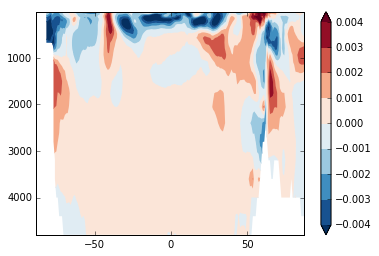

In [18]:
cf = iplt.contourf(trend_cube, cmap='RdBu_r', levels=[-0.004, -0.003, -0.002, -0.001, 0, 0.001, 0.002, 0.003, 0.004], extend='both')
cbar = plt.colorbar(cf)
plt.show()

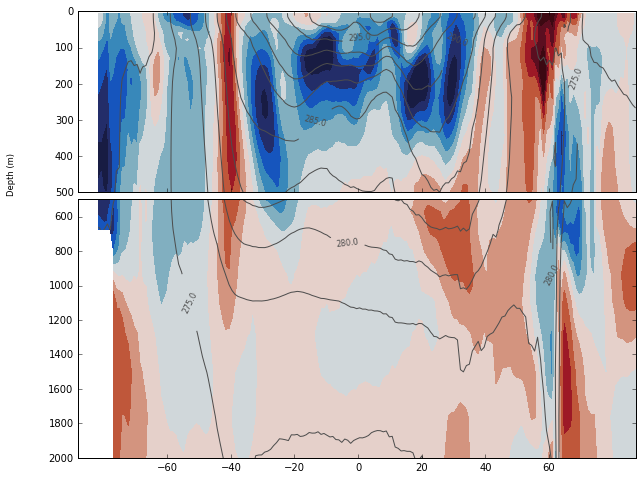

In [29]:
fig = plt.figure(figsize=[10, 8])
gs = gridspec.GridSpec(1, 1)

axMain = plt.subplot(gs[0])
plt.sca(axMain)

cmap = cmocean.cm.balance
#plt.cm.RdBu_r

lats = trend_cube.coord('latitude').points
levs = trend_cube.coord('depth').points            
trends = trend_cube.data
trend_ticks = [-0.005, -0.004, -0.003, -0.002, -0.001, 0, 0.001, 0.002, 0.003, 0.004, 0.005]

climatology = clim_cube.data
clim_levels = numpy.arange(0.0, 350.0, 2.5)

cf = axMain.contourf(lats, levs, trends,
                     cmap=cmap, extend='both', levels=trend_ticks)

cplot_main = axMain.contour(lats, levs, climatology, colors='0.3', levels=clim_levels)
plt.clabel(cplot_main, clim_levels[0::2], fmt='%2.1f', colors='0.3', fontsize=8)

# Deep section
axMain.set_ylim((500.0, 2000.0))
axMain.invert_yaxis()
axMain.set_xlim((-70, 70))
axMain.xaxis.set_ticks_position('bottom')
axMain.set_xticks([-60, -40, -20, 0, 20, 40, 60])
plt.ylabel('Depth (m)', fontsize='small')
axMain.get_yaxis().set_label_coords(-0.11, 1.1)

# Shallow section
divider = make_axes_locatable(axMain)
axShallow = divider.append_axes("top", size="70%", pad=0.1, sharex=axMain)
axShallow.contourf(lats, levs, trends,
                   cmap=cmap, extend='both', levels=trend_ticks)

cplot_shallow = axShallow.contour(lats, levs, climatology, colors='0.3', levels=clim_levels)
plt.clabel(cplot_shallow, clim_levels[0::2], fmt='%2.1f', colors='0.3', fontsize=8)

axShallow.set_ylim((0.0, 500.0))
axShallow.invert_yaxis()
plt.setp(axShallow.get_xticklabels(), visible=False)

plt.show()

In [ ]:
cmocean.cm.